In [0]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

dataArr = np.array([
[0.4000, 0.4439],
[0.2439, 0.1463],
[0.1707, 0.2293],
[0.2293, 0.7610],
[0.5171, 0.9414],
[0.8732, 0.6536],
[0.6878, 0.5219],
[0.8488, 0.3609],
[0.6683, 0.2536],
[0.6195, 0.2634]
])


epoch = 20
eta = 0.2
nEta = 0.1

eta = 0.2
nEta = 0.1
rangeDist = 2

start_eta = deepcopy(eta)
start_nEta = deepcopy(nEta)
start_rangeDist = deepcopy(rangeDist)

final_eta = 0.03
final_nEta = 0.01
final_rangeDist = 0


nNodes = 10
N = 10
weightOrg = np.random.rand(nNodes,2)

rangeDist = 1.0
alphaPerc = 1


In [44]:
neighbour = True

weight1 = deepcopy(weightOrg)
startingNumN = 2

numN=2
epoch = 500
for i in range(epoch): 
  
  for j in range(N): 
    city = dataArr[j,:]
    d = np.linalg.norm(city- weight1,axis = 1)
    shortestValue = np.min(d)
    shortestIndex = np.argmin(d)
    
    weight1[shortestIndex,:] += eta * (city - weight1[shortestIndex,:])
    if (neighbour):
      
      for j in range (2*numN+1):
        nIndex = (-1 * numN + j + shortestIndex) % N
        if(nIndex != shortestIndex):
          weight1[nIndex,:] += nEta * (city - weight1[nIndex,:])
  
  
  alphaA = float(i)/float(epoch)
  #learning rates and neighbour update
  #eta = start_eta*np.power(final_eta/start_eta,alphaA)
  #nEta = start_nEta*np.power(final_nEta/start_nEta,alphaA)
  
  newN = round((1.0-alphaA) * startingNumN)
  
  if(newN != numN):
    print("Neightbours changed at epoch " + str(i) + " to " + str(newN))
    numN = int(newN)
    
print(weight1)    

Neightbours changed at epoch 126 to 1.0
Neightbours changed at epoch 376 to 0.0
[[0.39782078 0.44315999]
 [0.23143233 0.76041433]
 [0.51660136 0.93860198]
 [0.68787515 0.5244044 ]
 [0.87221838 0.65160278]
 [0.84893867 0.36256443]
 [0.7114467  0.29235211]
 [0.64352699 0.25857491]
 [0.42764972 0.22362501]
 [0.20675486 0.18845341]]


[[0.     0.4    0.4439]
 [1.     0.2293 0.761 ]
 [2.     0.5171 0.9414]
 [3.     0.6878 0.5219]
 [4.     0.8732 0.6536]
 [5.     0.8488 0.3609]
 [7.     0.6683 0.2536]
 [7.     0.6195 0.2634]
 [9.     0.2439 0.1463]
 [9.     0.1707 0.2293]]
2.437680813378068


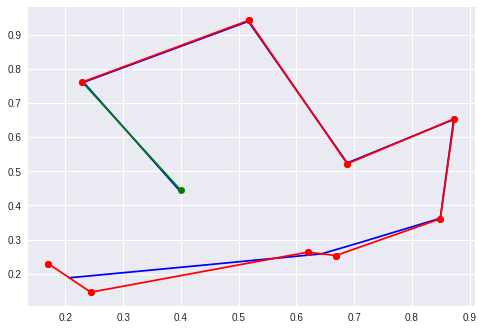

In [45]:

tour = np.zeros([N,1])
for j in range(N):
  city = dataArr[j]
  d = np.linalg.norm(city - weight1,axis = 1) 
  shortestValue = np.min(d)
  shortestIndex = np.argmin(d)
  # Storing the shortest index
  tour[j] = shortestIndex

  
stacked = np.append(tour,dataArr, axis=1)     
stacked = sorted(stacked, key=lambda stacked_entry: stacked_entry[0])
stacked = np.array(stacked)
print(stacked)

a = np.delete(stacked,0,1 )
#print(a)
# calculate dist
totalDist = 0
#print(weight1)
for i in range(len(weight1)-1):
  calc = a[i]-a[i+1]
  #print(calc)
  disDist = np.sqrt(np.sum((calc)**2))
  totalDist += disDist# np.sqrt(np.sum((weight1[i]-weight1[i+1])**2))
  #print("From")
  #print(weight1[i])
  #print("To")
  #print(weight1[i+1])
  #print(disDist)

print(totalDist)
#print(stacked[:,1])
plt.plot(weight1[:,0],weight1[:,1],'b-')

for i in range(0, 10, 1):
    if (i==0):
      plt.plot(stacked[i:i+2,1], stacked[i:i+2,2], 'go-')
    else:
      plt.plot(stacked[i:i+2,1], stacked[i:i+2,2], 'ro-')
plt.show()

#yoyo

# No method 2.8533970228076524
# Neighbour 2.4806860185251067

# No method 4.543481964634779
# Neighbour 2.146923523876523
